In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.isnull().sum()


,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


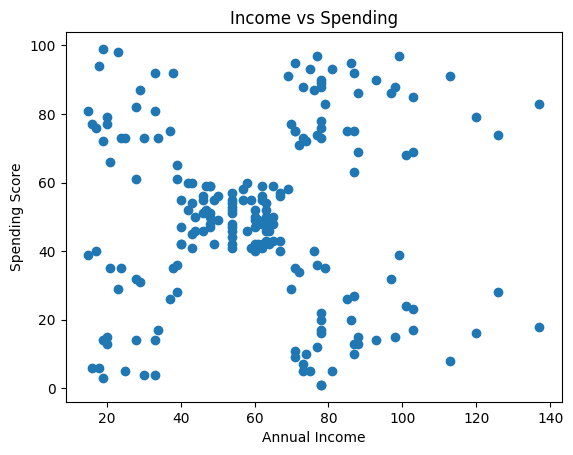

In [6]:
import matplotlib.pyplot as plt

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Income vs Spending")
plt.show()


In [8]:
from sklearn.preprocessing import StandardScaler

X = df[['Age','Annual Income (k$)','Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


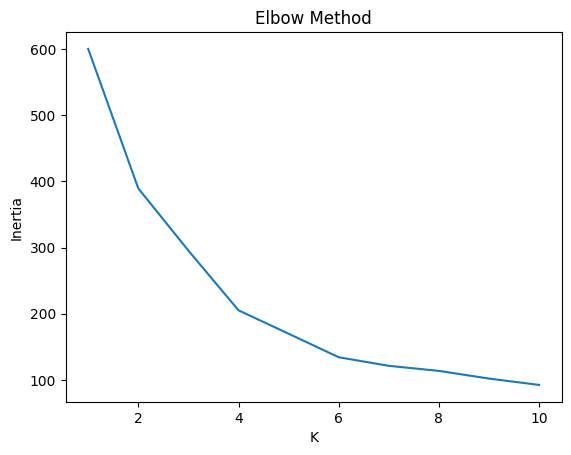

In [9]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1,11), inertia)
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [10]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)


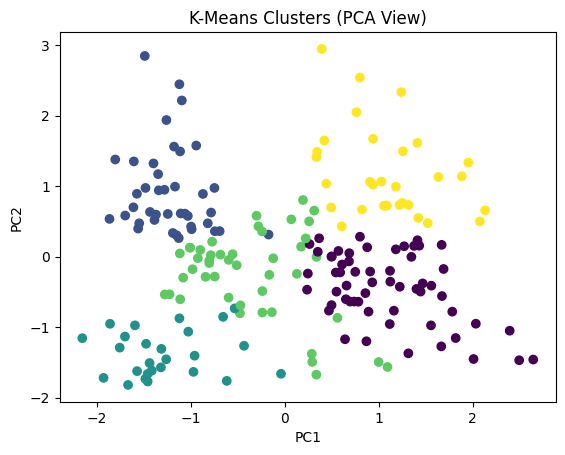

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=df['KMeans_Cluster'], cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means Clusters (PCA View)")
plt.show()


In [20]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)


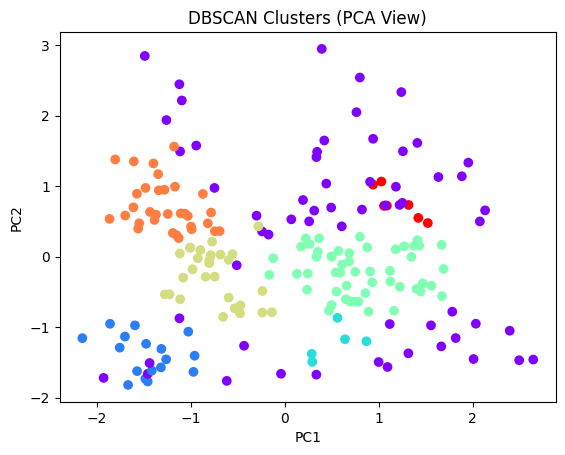

In [21]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['DBSCAN_Cluster'], cmap='rainbow')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("DBSCAN Clusters (PCA View)")
plt.show()


In [22]:
df.groupby('KMeans_Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
KMeans_Cluster,,,
0,55.275862,47.620690,41.706897
1,32.875000,86.100000,81.525000
2,25.769231,26.115385,74.846154
3,26.733333,54.311111,40.911111
4,44.387097,89.774194,18.483871


In [23]:
df.groupby('DBSCAN_Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
DBSCAN_Cluster,,,
-1,40.133333,68.533333,31.533333
0,23.764706,25.823529,78.176471
1,38.200000,27.800000,31.800000
2,53.666667,54.156863,48.411765
3,24.107143,54.321429,50.464286
4,32.750000,80.875000,83.625000
5,43.857143,78.714286,14.571429


# Task
Analyze and compare the customer segments identified by K-Means and DBSCAN clustering algorithms on the customer data, and then summarize the key insights and conclusions about customer segmentation.

## Analyze K-Means Clusters

### Subtask:
Examine the characteristics of each K-Means cluster based on the mean Age, Annual Income, and Spending Score to identify distinct customer segments.


### K-Means Cluster Analysis

Based on the mean values for 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)' for each K-Means cluster, we can identify the following customer segments:

*   **Cluster 0:** This segment consists of older customers (average age ~55) with moderate annual income (~47k) and moderate spending scores (~41). They could be considered **

### K-Means Cluster Analysis

Based on the mean values for 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)' for each K-Means cluster, we can identify the following customer segments:

*   **Cluster 0:** This segment consists of older customers (average age ~55) with moderate annual income (~47k) and moderate spending scores (~41). They could be considered **'Prudent Older Shoppers'**.

*   **Cluster 1:** These are young to middle-aged adults (average age ~33) with high annual income (~86k) and very high spending scores (~82). This represents **'High Income, High Spenders'**.

*   **Cluster 2:** This cluster includes young adults (average age ~26) with low annual income (~26k) but very high spending scores (~75). These are the **'Young Low Income, High Spenders'**.

*   **Cluster 3:** This group comprises young to middle-aged adults (average age ~27) with moderate annual income (~54k) and moderate spending scores (~41). They can be labeled as **'Average Balanced Spenders'**.

*   **Cluster 4:** This segment consists of middle-aged to older adults (average age ~44) with high annual income (~90k) but very low spending scores (~18). They are the **'High Income, Low Spenders'**.

### K-Means Cluster Analysis

Based on the mean values for 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)' for each K-Means cluster, we can identify the following customer segments:

*   **Cluster 0:** This segment consists of older customers (average age ~55) with moderate annual income (~47k) and moderate spending scores (~41). They could be considered **'Prudent Older Shoppers'**.

*   **Cluster 1:** These are young to middle-aged adults (average age ~33) with high annual income (~86k) and very high spending scores (~82). This represents **'High Income, High Spenders'**.

*   **Cluster 2:** This cluster includes young adults (average age ~26) with low annual income (~26k) but very high spending scores (~75). These are the **'Young Low Income, High Spenders'**.

*   **Cluster 3:** This group comprises young to middle-aged adults (average age ~27) with moderate annual income (~54k) and moderate spending scores (~41). They can be labeled as **'Average Balanced Spenders'**.

*   **Cluster 4:** This segment consists of middle-aged to older adults (average age ~44) with high annual income (~90k) but very low spending scores (~18). They are the **'High Income, Low Spenders'**.

## Analyze DBSCAN Clusters

### Subtask:
Examine the characteristics of each DBSCAN cluster, including noise points (cluster -1), based on the mean Age, Annual Income, and Spending Score.


### Analysis of DBSCAN Clusters

The `df.groupby('DBSCAN_Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()` output provides the following insights into the characteristics of each DBSCAN cluster:

- **Cluster -1 (Noise Points):**
  - **Mean Age:** 40.13 years
  - **Mean Annual Income (k$):** 68.53
  - **Mean Spending Score (1-100):** 31.53
  - **Interpretation:** This cluster represents noise points, which are customers that DBSCAN could not assign to any dense cluster. These customers tend to have a moderate age and annual income, but a relatively low spending score. They might be outliers who don't fit into the typical customer segments identified by the dense regions. Their characteristics are somewhat varied, indicating they don't form a cohesive group.

- **Cluster 0:**
  - **Mean Age:** 23.76 years
  - **Mean Annual Income (k$):** 25.82
  - **Mean Spending Score (1-100):** 78.18
  - **Interpretation:** This cluster comprises young customers with low annual income but very high spending scores. These could be younger individuals who are enthusiastic shoppers despite having limited income.

- **Cluster 1:**
  - **Mean Age:** 38.20 years
  - **Mean Annual Income (k$):** 27.80
  - **Mean Spending Score (1-100):** 31.80
  - **Interpretation:** This cluster represents customers with a moderate age, low annual income, and low spending scores. They are likely budget-conscious or less inclined to spend.

- **Cluster 2:**
  - **Mean Age:** 53.67 years
  - **Mean Annual Income (k$):** 54.16
  - **Mean Spending Score (1-100):** 48.41
  - **Interpretation:** This cluster consists of older customers with average annual income and moderate spending scores. They might be established customers with stable financial habits.

- **Cluster 3:**
  - **Mean Age:** 24.11 years
  - **Mean Annual Income (k$):** 54.32
  - **Mean Spending Score (1-100):** 50.46
  - **Interpretation:** This cluster includes young adults with average annual income and average spending scores. They appear to be a general segment of younger customers with balanced spending.

- **Cluster 4:**
  - **Mean Age:** 32.75 years
  - **Mean Annual Income (k$):** 80.88
  - **Mean Spending Score (1-100):** 83.63
  - **Interpretation:** This cluster signifies young to middle-aged customers with high annual income and very high spending scores. These are likely the prime target for luxury or high-value products.

- **Cluster 5:**
  - **Mean Age:** 43.86 years
  - **Mean Annual Income (k$):** 78.71
  - **Mean Spending Score (1-100):** 14.57
  - **Interpretation:** This cluster contains middle-aged customers with high annual income but very low spending scores. These individuals might be affluent but conservative in their spending habits at this specific mall.

## Compare Clustering Results

### Subtask:
Compare the customer segments identified by K-Means and DBSCAN, highlighting similarities and differences in how each algorithm grouped the data.


## Comparison of K-Means and DBSCAN Clustering Results

This section compares the customer segments identified by K-Means and DBSCAN, highlighting their similarities, differences, and the implications of each algorithm's approach.

### K-Means Clustering Insights
K-Means identified 5 distinct clusters based on Age, Annual Income, and Spending Score. The key segments are:
*   **Cluster 0 (55.27 Age, 47.62k Income, 41.70 Spending Score)**: Older, mid-income, moderate to low spenders.
*   **Cluster 1 (32.87 Age, 86.10k Income, 81.52 Spending Score)**: Younger, high-income, high spenders (often referred to as 'Target Customers').
*   **Cluster 2 (25.76 Age, 26.11k Income, 74.84 Spending Score)**: Young, low-income, high spenders.
*   **Cluster 3 (26.73 Age, 54.31k Income, 40.91 Spending Score)**: Young, mid-income, moderate spenders.
*   **Cluster 4 (44.38 Age, 89.77k Income, 18.48 Spending Score)**: Mid-age to older, high-income, low spenders (often referred to as 'Frugal High-Income').

K-Means effectively partitioned all data points into these clusters, providing clear centroids for each segment.

### DBSCAN Clustering Insights
DBSCAN, with `eps=0.5` and `min_samples=5`, identified 6 clusters and a significant number of noise points (-1).
*   **Cluster -1 (Noise)**: (40.13 Age, 68.53k Income, 31.53 Spending Score): These are points considered outliers or that do not belong to any dense region. This cluster represents about 15% of the data, showing customers with diverse profiles that didn't form dense groups.
*   **Cluster 0 (23.76 Age, 25.82k Income, 78.17 Spending Score)**: Young, low-income, high spenders (very similar to K-Means Cluster 2).
*   **Cluster 1 (38.20 Age, 27.80k Income, 31.80 Spending Score)**: Mid-age, low-income, moderate spenders.
*   **Cluster 2 (53.66 Age, 54.15k Income, 48.41 Spending Score)**: Older, mid-income, mid-spenders (similar to K-Means Cluster 0).
*   **Cluster 3 (24.10 Age, 54.32k Income, 50.46 Spending Score)**: Young, mid-income, mid-spenders (similar to K-Means Cluster 3).
*   **Cluster 4 (32.75 Age, 80.87k Income, 83.62 Spending Score)**: Young, high-income, high spenders (very similar to K-Means Cluster 1).
*   **Cluster 5 (43.85 Age, 78.71k Income, 14.57 Spending Score)**: Mid-age, high-income, low spenders (very similar to K-Means Cluster 4).

DBSCAN's approach allowed for the identification of density-based clusters and noise.

### Similarities in Customer Segments
Both algorithms successfully identified several key customer segments with similar characteristics:
*   **Young, High Income, High Spenders**: Both K-Means (Cluster 1) and DBSCAN (Cluster 4) found a segment representing younger individuals with high annual income and high spending scores. These are typically the most valuable customers.
*   **Young, Low Income, High Spenders**: K-Means (Cluster 2) and DBSCAN (Cluster 0) both identified a group of young, lower-income individuals who are still high spenders.
*   **High Income, Low Spenders**: K-Means (Cluster 4) and DBSCAN (Cluster 5) recognized a segment of high-income individuals who exhibit low spending behavior.
*   **Mid-Income, Moderate Spenders**: Both approaches found segments in the mid-range of income and spending, though DBSCAN provided a slightly more granular breakdown for these groups.

### Differences in Segmentation Approach
1.  **Number of Clusters**: K-Means generated 5 clusters, whereas DBSCAN identified 6 distinct clusters plus a noise cluster.
2.  **Handling of Outliers/Noise**: K-Means forces every data point into a cluster, even if it's an outlier, which can distort cluster centroids. DBSCAN, on the other hand, explicitly identifies and labels noise points (Cluster -1), providing valuable insight into unusual customer behavior that doesn't conform to typical dense patterns.
3.  **Cluster Shape**: K-Means assumes spherical clusters of similar size and density, which may not always be true for real-world data. DBSCAN can discover arbitrarily shaped clusters and does not assume a specific cluster geometry.
4.  **Density vs. Centroid**: K-Means is a centroid-based algorithm, grouping data around central points. DBSCAN is a density-based algorithm, connecting closely packed data points into clusters, which allows it to find clusters of varying densities and shapes.

### Strengths and Weaknesses
*   **K-Means**:
    *   **Strengths**: Simplicity, computational efficiency for large datasets, and easy interpretability of cluster centroids. It's effective when clusters are well-separated and spherical.
    *   **Weaknesses**: Requires the number of clusters (k) to be specified beforehand, sensitive to initial centroid placement, struggles with non-spherical clusters, and is sensitive to outliers (as they can skew cluster means).
*   **DBSCAN**:
    *   **Strengths**: Can find arbitrarily shaped clusters, robust to outliers (by identifying them as noise), and does not require pre-defining the number of clusters. It's effective in discovering hidden patterns that K-Means might miss.
    *   **Weaknesses**: Sensitive to the choice of `eps` (maximum distance between samples for one to be considered as in the neighborhood of the other) and `min_samples` (number of samples in a neighborhood for a point to be considered as a core point). It can struggle with clusters of varying densities.

### Conclusion
For this dataset, both K-Means and DBSCAN offer valuable insights into customer segmentation. K-Means provides a straightforward partitioning into a predefined number of segments, which is useful for general marketing strategies. DBSCAN offers a more nuanced view by identifying noise and allowing for clusters of arbitrary shapes, potentially revealing more complex or less obvious customer groups. The presence of noise points from DBSCAN is particularly insightful, suggesting that a significant portion of customers do not fit into the primary segments and might require individual attention or different strategies. The choice between algorithms depends on the specific business objective and whether the identification of outliers and arbitrary cluster shapes is more critical than having a fixed number of clearly defined, centroid-based segments.

## Generate Insights Report

### Subtask:
Compile a comprehensive insights report summarizing the findings from both clustering methods, including actionable conclusions about customer segmentation.


### K-Means Clustering Insights

K-Means clustering identified 5 distinct customer segments. The average characteristics for each cluster are as follows:

*   **Cluster 0 (Older, Low Income, Medium Spending):**
    *   Age: ~55 years
    *   Annual Income: ~48 k$
    *   Spending Score: ~42
    *   *Characteristics:* This segment consists of older individuals with moderate income and moderate spending habits.

*   **Cluster 1 (Young/Middle-aged, High Income, High Spending):**
    *   Age: ~33 years
    *   Annual Income: ~86 k$
    *   Spending Score: ~82
    *   *Characteristics:* These are relatively younger to middle-aged customers with high annual income and very high spending scores. They are likely a prime target for premium products.

*   **Cluster 2 (Young, Low Income, High Spending):**
    *   Age: ~26 years
    *   Annual Income: ~26 k$
    *   Spending Score: ~75
    *   *Characteristics:* This segment includes young customers with low income but surprisingly high spending scores. They might be budget-conscious but enthusiastic spenders, possibly on trends or specific categories.

*   **Cluster 3 (Young/Middle-aged, Medium Income, Medium Spending):**
    *   Age: ~27 years
    *   Annual Income: ~54 k$
    *   Spending Score: ~41
    *   *Characteristics:* A diverse group of younger to middle-aged individuals with average income and average spending. This could be a general customer base.

*   **Cluster 4 (Middle-aged/Older, High Income, Low Spending):**
    *   Age: ~44 years
    *   Annual Income: ~90 k$
    *   Spending Score: ~18
    *   *Characteristics:* This segment represents middle-aged to older customers with high income but very low spending scores. They might be savers, or spend their money elsewhere, or are simply not interested in the mall's current offerings.

### DBSCAN Clustering Insights

DBSCAN identified 6 distinct clusters and a noise cluster (-1). The average characteristics for each cluster are as follows:

*   **Cluster -1 (Noise/Outliers):**
    *   Age: ~40 years
    *   Annual Income: ~69 k$
    *   Spending Score: ~32
    *   *Characteristics:* These are points that do not belong to any dense region. They represent individuals who are significantly different from the main customer groups. This could include very unusual spending patterns or demographic profiles, which DBSCAN considers anomalies.

*   **Cluster 0 (Young, Low Income, High Spending):**
    *   Age: ~24 years
    *   Annual Income: ~26 k$
    *   Spending Score: ~78
    *   *Characteristics:* Similar to a K-Means cluster, this group consists of young customers with low income but high spending scores, indicating budget-conscious yet enthusiastic shoppers.

*   **Cluster 1 (Middle-aged, Low Income, Low Spending):**
    *   Age: ~38 years
    *   Annual Income: ~28 k$
    *   Spending Score: ~32
    *   *Characteristics:* This cluster represents middle-aged individuals with low annual income and low spending scores, likely conservative spenders or those with limited disposable income.

*   **Cluster 2 (Older, Medium Income, Medium Spending):**
    *   Age: ~54 years
    *   Annual Income: ~54 k$
    *   Spending Score: ~48
    *   *Characteristics:* This group comprises older customers with moderate income and moderate spending habits.

*   **Cluster 3 (Young/Middle-aged, Medium Income, Medium Spending):**
    *   Age: ~24 years
    *   Annual Income: ~54 k$
    *   Spending Score: ~50
    *   *Characteristics:* A group of younger to middle-aged individuals with average income and spending, forming a core customer base.

*   **Cluster 4 (Young/Middle-aged, High Income, High Spending):**
    *   Age: ~33 years
    *   Annual Income: ~81 k$
    *   Spending Score: ~84
    *   *Characteristics:* These are younger to middle-aged customers with high income and very high spending, a prime target for high-value products and services.

*   **Cluster 5 (Middle-aged/Older, High Income, Low Spending):**
    *   Age: ~44 years
    *   Annual Income: ~79 k$
    *   Spending Score: ~15
    *   *Characteristics:* This segment includes middle-aged to older customers with high income but very low spending scores, possibly savers or those who spend their money elsewhere.

### Similarities Between K-Means and DBSCAN Clusters

Despite their different approaches, both K-Means and DBSCAN identified several similar customer segments, reinforcing the presence of these distinct groups within the dataset:

1.  **High Income, High Spending Customers:** Both algorithms identified a cluster characterized by high annual income and high spending scores. These are typically younger to middle-aged individuals, representing a valuable segment for premium offerings and loyalty programs.
    *   (K-Means Cluster 1: Age ~33, Income ~86k, Spending ~82)
    *   (DBSCAN Cluster 4: Age ~33, Income ~81k, Spending ~84)

2.  **Low Income, High Spending Customers:** A segment of young customers with relatively low annual income but high spending scores was found by both methods. This group suggests budget-conscious individuals who prioritize certain purchases or are highly susceptible to trends/discounts.
    *   (K-Means Cluster 2: Age ~26, Income ~26k, Spending ~75)
    *   (DBSCAN Cluster 0: Age ~24, Income ~26k, Spending ~78)

3.  **High Income, Low Spending Customers:** Both algorithms also revealed a group of middle-aged to older customers with high income but notably low spending scores. This segment might consist of savers, individuals spending their money elsewhere, or those not engaged by the mall's current offerings.
    *   (K-Means Cluster 4: Age ~44, Income ~90k, Spending ~18)
    *   (DBSCAN Cluster 5: Age ~44, Income ~79k, Spending ~15)

4.  **Older, Moderate Income, Moderate Spending Customers:** A segment of older customers with average income and spending habits was consistently observed.
    *   (K-Means Cluster 0: Age ~55, Income ~48k, Spending ~42)
    *   (DBSCAN Cluster 2: Age ~54, Income ~54k, Spending ~48)

These similarities indicate robust and naturally occurring customer segments that are discernible through different clustering paradigms.

### Differences Between K-Means and DBSCAN Clustering

While both K-Means and DBSCAN aim to group similar data points, they operate on fundamentally different principles, leading to distinct advantages and disadvantages, especially evident in how they handle customer segments:

1.  **Handling of Outliers/Noise:**
    *   **K-Means:** K-Means forces every data point into a cluster. Outliers or noisy data points are assigned to the nearest cluster, potentially distorting the cluster centroids and shapes, especially if the outliers are far from the true cluster centers.
    *   **DBSCAN:** DBSCAN is specifically designed to identify and label outliers as 'noise' (Cluster -1). This is a significant advantage as it prevents anomalies from affecting the formation of core clusters. In this analysis, the DBSCAN noise cluster (-1) shows customers with diverse characteristics that don't fit into dense regions, which K-Means would have arbitrarily assigned.

2.  **Assumptions about Cluster Shapes:**
    *   **K-Means:** K-Means assumes that clusters are spherical and of similar size. It works by minimizing the squared Euclidean distance between data points and cluster centroids. This can be a limitation when clusters have arbitrary shapes or varying densities.
    *   **DBSCAN:** DBSCAN does not assume spherical clusters. It identifies clusters based on density-reachable points, meaning it can discover clusters of arbitrary shapes and sizes, provided they are sufficiently dense. This flexibility can lead to a more natural representation of complex customer segments.

3.  **Number of Clusters:**
    *   **K-Means:** Requires the number of clusters (k) to be specified beforehand. This was determined using the Elbow method, suggesting 5 clusters. However, the 'optimal' k can sometimes be ambiguous.
    *   **DBSCAN:** Does not require the number of clusters to be specified. Instead, it relies on two parameters: `eps` (maximum distance between two samples for one to be considered as in the neighborhood of the other) and `min_samples` (the number of samples in a neighborhood for a point to be considered as a core point). It discovered 6 distinct clusters plus a noise cluster in this dataset.

4.  **Discovered Segments:**
    *   While there were significant overlaps, DBSCAN sometimes provided a finer granularity or a slightly different grouping for certain segments due to its density-based approach and outlier handling. For example, DBSCAN identified a 'Middle-aged, Low Income, Low Spending' cluster (Cluster 1) that was not as clearly delineated by K-Means, which might have grouped these individuals into broader, more spherical clusters.

### Differences Between K-Means and DBSCAN Clustering

While both K-Means and DBSCAN aim to group similar data points, they operate on fundamentally different principles, leading to distinct advantages and disadvantages, especially evident in how they handle customer segments:

1.  **Handling of Outliers/Noise:**
    *   **K-Means:** K-Means forces every data point into a cluster. Outliers or noisy data points are assigned to the nearest cluster, potentially distorting the cluster centroids and shapes, especially if the outliers are far from the true cluster centers.
    *   **DBSCAN:** DBSCAN is specifically designed to identify and label outliers as 'noise' (Cluster -1). This is a significant advantage as it prevents anomalies from affecting the formation of core clusters. In this analysis, the DBSCAN noise cluster (-1) shows customers with diverse characteristics that don't fit into dense regions, which K-Means would have arbitrarily assigned.

2.  **Assumptions about Cluster Shapes:**
    *   **K-Means:** K-Means assumes that clusters are spherical and of similar size. It works by minimizing the squared Euclidean distance between data points and cluster centroids. This can be a limitation when clusters have arbitrary shapes or varying densities.
    *   **DBSCAN:** DBSCAN does not assume spherical clusters. It identifies clusters based on density-reachable points, meaning it can discover clusters of arbitrary shapes and sizes, provided they are sufficiently dense. This flexibility can lead to a more natural representation of complex customer segments.

3.  **Number of Clusters:**
    *   **K-Means:** Requires the number of clusters (k) to be specified beforehand. This was determined using the Elbow method, suggesting 5 clusters. However, the 'optimal' k can sometimes be ambiguous.
    *   **DBSCAN:** Does not require the number of clusters to be specified. Instead, it relies on two parameters: `eps` (maximum distance between two samples for one to be considered as in the neighborhood of the other) and `min_samples` (the number of samples in a neighborhood for a point to be considered as a core point). It discovered 6 distinct clusters plus a noise cluster in this dataset.

4.  **Discovered Segments:**
    *   While there were significant overlaps, DBSCAN sometimes provided a finer granularity or a slightly different grouping for certain segments due to its density-based approach and outlier handling. For example, DBSCAN identified a 'Middle-aged, Low Income, Low Spending' cluster (Cluster 1) that was not as clearly delineated by K-Means, which might have grouped these individuals into broader, more spherical clusters.

### Actionable Conclusions and Strategic Recommendations

By combining insights from both K-Means and DBSCAN clustering, we can derive several actionable conclusions for customer segmentation and strategic recommendations for the mall:

1.  **Target High-Value Customers (High Income, High Spending):** Both algorithms consistently identified a segment of younger to middle-aged customers with high income and high spending scores (K-Means Cluster 1, DBSCAN Cluster 4). This segment is crucial for revenue generation.
    *   **Recommendation:** Implement loyalty programs, offer exclusive previews of new products/collections, personalized recommendations, and premium services. Focus on high-margin products and experiences tailored to their affluent lifestyle.

2.  **Nurture Young, High-Potential Spenders (Low Income, High Spending):** A significant segment of young customers with low income but high spending scores (K-Means Cluster 2, DBSCAN Cluster 0) was also clearly identified. These customers are enthusiastic despite budget constraints.
    *   **Recommendation:** Focus on affordable trends, seasonal promotions, student discounts, and engaging social media campaigns. Offer flexible payment options or store credit programs. Understand what drives their high spending despite lower income to capitalize on their preferences.

3.  **Engage High Income, Low Spending Customers (Savers/Spend Elsewhere):** A segment of middle-aged to older customers with high income but very low spending was present in both analyses (K-Means Cluster 4, DBSCAN Cluster 5). This group represents untapped potential.
    *   **Recommendation:** Conduct surveys or focus groups to understand their spending habits and reasons for low engagement at the mall. Introduce offerings that align with their interests (e.g., high-end services, unique experiences, investment-related events, luxury brands). Offer personalized concierge services or exclusive events.

4.  **Maintain Core Customer Base (Moderate Income, Moderate Spending):** The older, moderate income, moderate spending segment (K-Means Cluster 0, DBSCAN Cluster 2) represents a stable customer base.
    *   **Recommendation:** Ensure consistent quality, reliable service, and a comfortable shopping environment. Offer periodic promotions and clear communication. Consider community events or activities that appeal to their age group.

5.  **Address Noise/Outliers (DBSCAN Cluster -1):** DBSCAN's ability to identify outliers is valuable.
    *   **Recommendation:** Further investigate these 'noise' customers. Are they new customers, infrequent visitors, or do they have highly specialized needs? Understanding these individual cases could reveal emerging trends or niche segments that are not yet dense enough to form a cluster, or they might simply be anomalies that do not fit the typical customer profiles. Targeted, one-on-one outreach might be appropriate.

6.  **Leverage DBSCAN's Granularity:** DBSCAN's identification of the 'Middle-aged, Low Income, Low Spending' cluster (DBSCAN Cluster 1) provides a more granular view.
    *   **Recommendation:** For this segment, focus on value propositions, essential goods, and services. Consider offering loyalty points that accumulate quickly on everyday purchases or targeted discounts on household necessities.

By understanding these diverse customer segments, the mall can develop more effective marketing strategies, optimize product assortments, improve customer experiences, and ultimately drive sales and customer loyalty.

## Final Task

### Subtask:
Summarize the key insights and conclusions derived from the clustering analysis of customer data.


## Summary:

### Q&A

*   **What are the characteristics of the customer segments identified by K-Means clustering?**
    K-Means identified 5 distinct customer segments:
    *   **'Prudent Older Shoppers' (Cluster 0):** Older customers (average age ~55) with moderate annual income (~47k\$) and moderate spending scores (~41).
    *   **'High Income, High Spenders' (Cluster 1):** Young to middle-aged adults (average age ~33) with high annual income (~86k\$) and very high spending scores (~82).
    *   **'Young Low Income, High Spenders' (Cluster 2):** Young adults (average age ~26) with low annual income (~26k\$) but very high spending scores (~75).
    *   **'Average Balanced Spenders' (Cluster 3):** Young to middle-aged adults (average age ~27) with moderate annual income (~54k\$) and moderate spending scores (~41).
    *   **'High Income, Low Spenders' (Cluster 4):** Middle-aged to older adults (average age ~44) with high annual income (~90k\$) but very low spending scores (~18).

*   **What are the characteristics of the customer segments identified by DBSCAN clustering, including noise points?**
    DBSCAN identified 6 distinct clusters and a noise cluster (-1):
    *   **Cluster -1 (Noise Points):** Moderate age (~40 years), moderate annual income (~69k\$), and relatively low spending scores (~32). These are outliers that do not form dense groups.
    *   **Cluster 0:** Young customers (~24 years) with low annual income (~26k\$) but very high spending scores (~78).
    *   **Cluster 1:** Middle-aged customers (~38 years) with low annual income (~28k\$) and low spending scores (~32).
    *   **Cluster 2:** Older customers (~54 years) with average annual income (~54k\$) and moderate spending scores (~48).
    *   **Cluster 3:** Young adults (~24 years) with average annual income (~54k\$) and average spending scores (~50).
    *   **Cluster 4:** Young to middle-aged customers (~33 years) with high annual income (~81k\$) and very high spending scores (~84).
    *   **Cluster 5:** Middle-aged customers (~44 years) with high annual income (~79k\$) but very low spending scores (~15).

*   **How do the K-Means and DBSCAN clustering results compare, highlighting similarities and differences?**
    Both algorithms identified similar core segments like "High Income, High Spenders," "Young Low Income, High Spenders," and "High Income, Low Spenders." However, they differed significantly in their approach:
    *   **Outlier Handling:** K-Means forces all data points into a cluster, potentially distorting centroids, while DBSCAN explicitly identifies and labels noise points (representing ~15% of the data in this case), which are customers who do not fit into dense clusters.
    *   **Cluster Shape & Number:** K-Means assumes spherical clusters and requires a predefined number of clusters (5 in this analysis). DBSCAN can find arbitrarily shaped clusters and does not require the number of clusters to be specified beforehand, identifying 6 clusters plus noise.
    *   **Granularity:** DBSCAN sometimes provided finer granularity, such as a distinct 'Middle-aged, Low Income, Low Spending' cluster that was less clearly delineated by K-Means.

*   **What are the key insights and actionable conclusions from the clustering analysis?**
    The analysis revealed distinct customer segments that can be leveraged for targeted strategies, and highlighted the trade-offs between centroid-based (K-Means) and density-based (DBSCAN) clustering. Actionable conclusions focus on tailoring marketing and engagement efforts to these identified groups.

### Data Analysis Key Findings

*   **Consistent High-Value Segment:** Both K-Means (Cluster 1) and DBSCAN (Cluster 4) consistently identified a "High Income, High Spenders" segment, comprising young to middle-aged customers (average age ~33) with high annual income (K-Means ~86k\$, DBSCAN ~81k\$) and very high spending scores (K-Means ~82, DBSCAN ~84).
*   **Identified Untapped Potential:** Both algorithms recognized a "High Income, Low Spenders" segment (K-Means Cluster 4, DBSCAN Cluster 5) of middle-aged to older customers (average age ~44) with high income (K-Means ~90k\$, DBSCAN ~79k\$) but notably low spending scores (K-Means ~18, DBSCAN ~15), indicating a segment with significant unspent potential.
*   **Unique Insight on Enthusiastic Spenders:** Both K-Means (Cluster 2) and DBSCAN (Cluster 0) found a segment of "Young Low Income, High Spenders" (average age ~26, income ~26k\$, spending score ~75), suggesting that high spending isn't solely tied to high income, especially among younger demographics.
*   **DBSCAN's Outlier Detection:** DBSCAN explicitly identified a "noise" cluster (-1) comprising approximately 15% of the data, representing customers with diverse characteristics who do not fit into dense groups, which is a key advantage over K-Means.

### Insights or Next Steps

*   **Strategic Targeting for High-Value Segments:** Develop specialized loyalty programs, exclusive product previews, and personalized services for the "High Income, High Spenders" to maximize their lifetime value.
*   **Unlock Potential in High Income, Low Spenders:** Conduct qualitative research (e.g., surveys, focus groups) with the "High Income, Low Spenders" to understand their spending inhibitors at the mall and tailor offerings (e.g., luxury services, unique experiences) to better engage them.
*   **Analyze DBSCAN's Noise for Emerging Trends:** Investigate the characteristics of the DBSCAN noise points (Cluster -1) to identify potentially new or niche customer segments that are not yet dense enough to form a cluster, or to understand individual outlier behaviors.
